<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/W9_Supervised_Regressions%26GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Supervised Machine Learning

We'll next consider **supervised** machine learning, which learns a function from input features to output classes.

## 3.2 Linear Regression

Let's start with a simple scatter plot of points where we should be able to find the regression line...

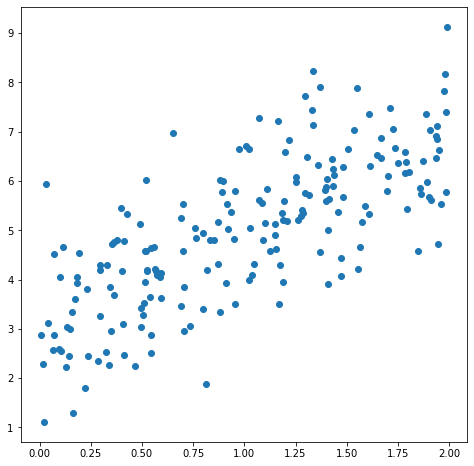

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a series of points
X = 2 * np.random.rand(200, 1)

# We are plotting y = 2x + 3 plus a random
# value 
y = 2 * X + 3 + np.random.randn(200, 1)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)


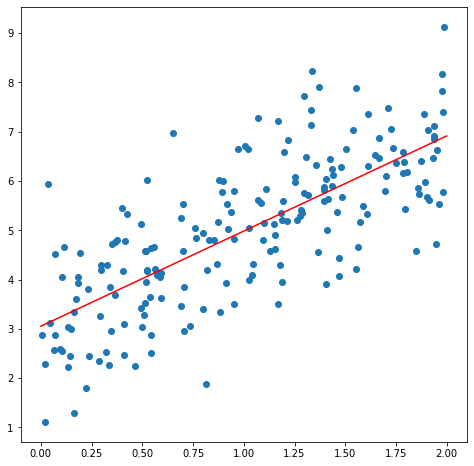

Intercept: [3.05288046]
Coefficient: [[1.93055378]]


In [ ]:
from sklearn.linear_model import LinearRegression

# Use regression to get slope + intercept for
# a line matching the points
rgr = LinearRegression()
rgr.fit(X, y)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)

# The line will be from 0 -> 3 non-inclusive
X2 = range(0,3)
y2 = rgr.coef_*X2 + rgr.intercept_
ax.plot(X2, y2.T, color='red')
plt.show()

print ("Intercept:", rgr.intercept_)
print ("Coefficient:",rgr.coef_)

How can we actually do this ourselves?

We can use the "normal equation" $(X^T X)^{-1} X^T y$ to compute this using a closed form solution.  It's a bit expensive, and it does require that we add the intercept $x_0=1$ to the $X$ matrix...

Intercept:  [3.05288046]
Coefficient:  [1.93055378]


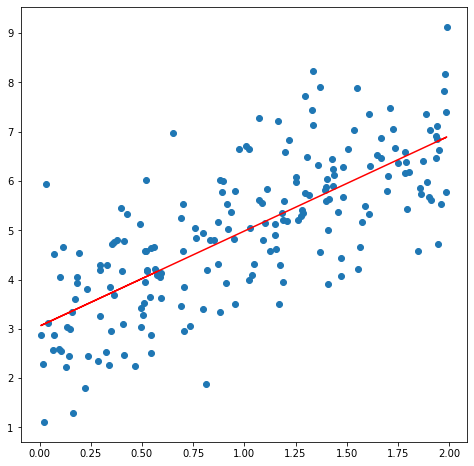

In [ ]:
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Insert the x_0 column
X_with_bias = np.ones((X.shape[0],2))
X_with_bias[:,1] = X.T

b = inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
print('Intercept: ', b[0])
print('Coefficient: ', b[1])

# predict using coefficients
yhat = X_with_bias.dot(b)
# plot data and predictions
# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)

plt.plot(X, yhat, color='red')
plt.show()


How well do the above coefficient + intercept match our original $y = 2x + 3 + random$ equation?

How about some real data?


In [ ]:
import pandas as pd
from sklearn.datasets import load_boston


# Boston housing dataset
housing_data = load_boston()

housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_df['Price'] = housing_data.target
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
y = housing_df['Price']
X = housing_df.drop(columns=['Price'])

Before we run Linear Regression we should know if we have multicolinearity, i.e., the features are heavily correlated.

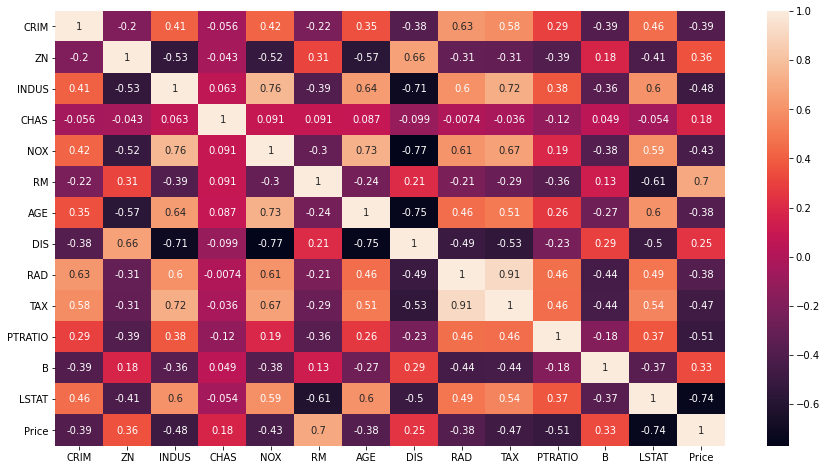

In [ ]:
# Is the data correlated?
corr_matrix = housing_df.corr()

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X2 = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4)

Score: 0.7185533694126434
MAE: 3.520355969133342
MSE: 25.72293107880328
RMSE: 5.071777901170681


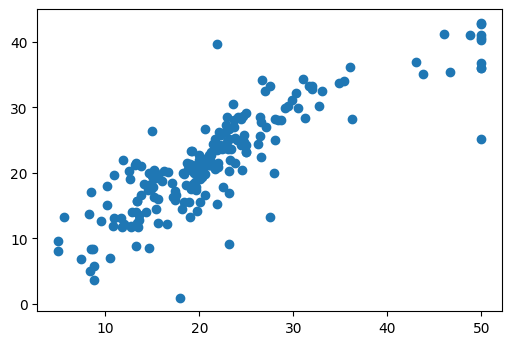

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))




22.55932496378149
[-2.46358139e-02 -1.33733301e-02  6.49370796e-02  4.40142345e-02
 -2.19074601e-01 -8.65832815e-01  1.84672852e-01 -3.88441961e-01
 -1.20058041e+00 -1.13606157e+00 -4.30099458e+00  3.47381198e+00
 -1.65511042e+01]


<BarContainer object of 13 artists>

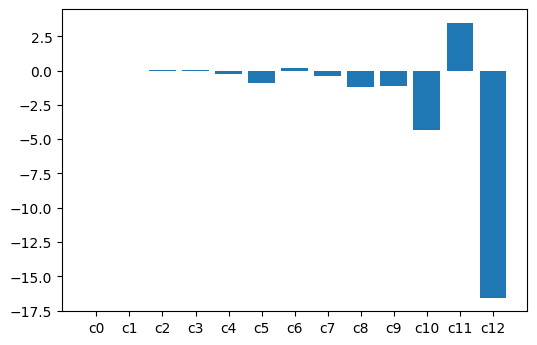

In [ ]:
print(clf.intercept_)
print(clf.coef_)
plt.figure(dpi=100)
#plt.bar(housing_data.feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

How about if we add normalization?


Score: 0.6424652163439284
MAE: 3.858916954964473
MSE: 32.67703926341878
RMSE: 5.716383407664218
[-0.02431104 -0.01365949  0.07035485  0.04358221 -0.18201984 -0.80485798
  0.11004901 -0.31933467 -0.77594037 -0.44930727 -0.          0.
 -0.        ]


<BarContainer object of 13 artists>

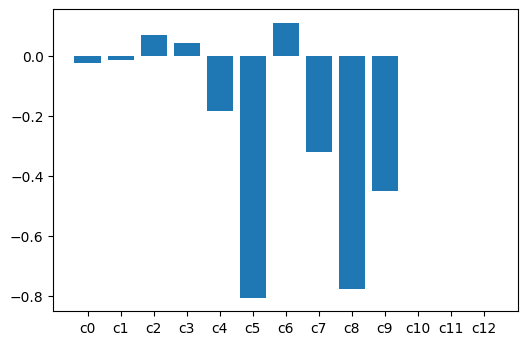

In [ ]:
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
#plt.bar(housing_data.feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

Now let's redo *without* PCA...

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Score: 0.7039973526954314
MAE: 3.8850271101736147
MSE: 27.44455062296323
RMSE: 5.238754682456817


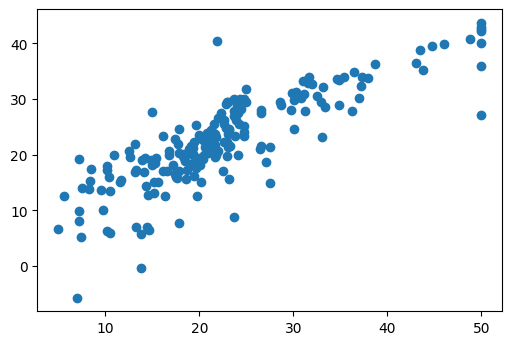

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))




31.61429225336325
[-1.10541239e-01  3.51445564e-02  1.44561402e-01  2.02887240e+00
 -2.08095051e+01  4.32311310e+00  7.53699914e-03 -1.39281311e+00
  3.69336268e-01 -1.14637117e-02 -9.11523110e-01  1.08220661e-02
 -5.98570370e-01]


<BarContainer object of 13 artists>

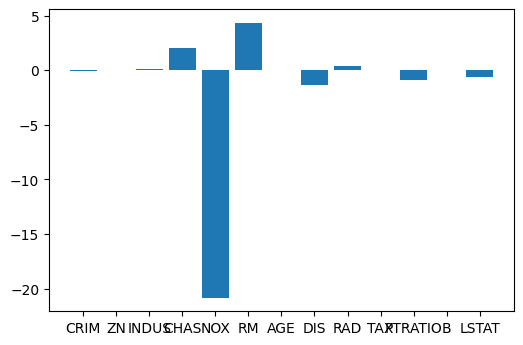

In [ ]:
print(clf.intercept_)
print(clf.coef_)
plt.figure(dpi=100)
plt.bar(housing_data.feature_names,clf.coef_)


With Lasso / L1 regularization... Which we know isn't super helpful with multicollinearity...

Score: 0.6746267953503291
MAE: 3.9463942028186754
MSE: 30.16770784882722
RMSE: 5.492513800513133
[-0.07769588  0.03404854  0.          0.         -0.          0.95891901
  0.02684725 -0.59352004  0.28840494 -0.01193397 -0.65828563  0.01052315
 -0.82363951]


<BarContainer object of 13 artists>

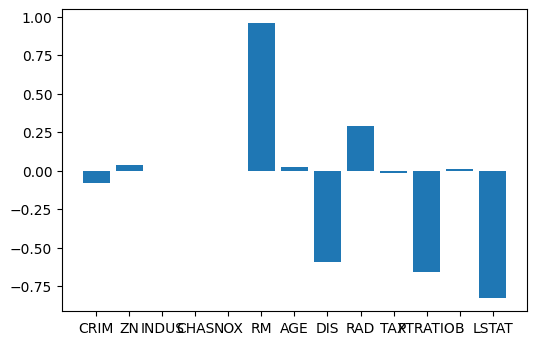

In [ ]:
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
plt.bar(housing_data.feature_names,clf.coef_)

But ridge (L2) regression helps in this case!

Score: 0.7069601485241435
MAE: 3.8124687894911458
MSE: 27.169848349699695
RMSE: 5.212470465115337
[-1.01556440e-01  3.86026489e-02  9.50198697e-02  1.99681812e+00
 -1.00769807e+01  4.35212113e+00 -7.74464826e-04 -1.24105144e+00
  3.40169656e-01 -1.21957779e-02 -7.82297266e-01  1.18711802e-02
 -6.13035619e-01]


<BarContainer object of 13 artists>

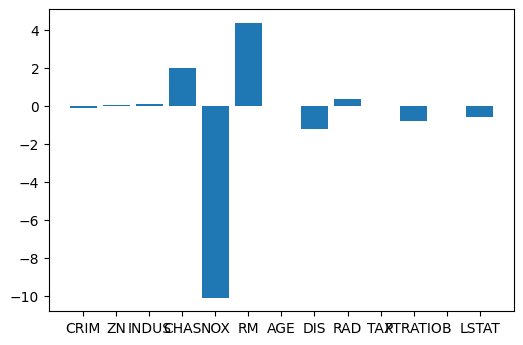

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
plt.bar(housing_data.feature_names,clf.coef_)

Score: 0.6181546787010386
MAE: 3.645832822848912
MSE: 28.594649921907198
RMSE: 5.347396555512523
[-0.00566155  0.07735367 -0.07821781  0.         -0.          1.41008979
  0.02606585 -0.82573693  0.25515817 -0.01731954 -0.56237368  0.00804697
 -0.71888293]


<BarContainer object of 13 artists>

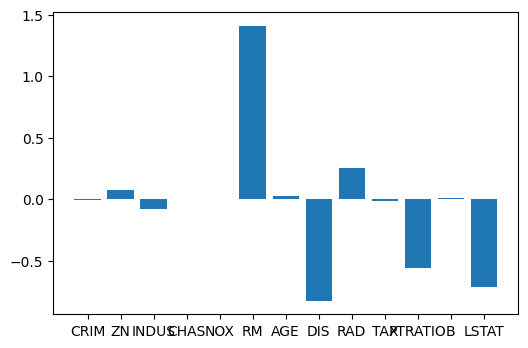

In [ ]:
from sklearn.linear_model import ElasticNet


clf = ElasticNet()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
plt.bar(housing_data.feature_names,clf.coef_)

## 3.3 Logistic Regression

Logistic regression uses techniques from linear regression but tries to map to Boolean values.

### 3.3.1 The Logistic Function

Let's look at the **logit** or **logistic** function, also called the **sigmoid** function and indicated by $\sigma$, which is "near linear" but flattens at 0 and 1.  Let's look at several variations, also vs a linear and step function...

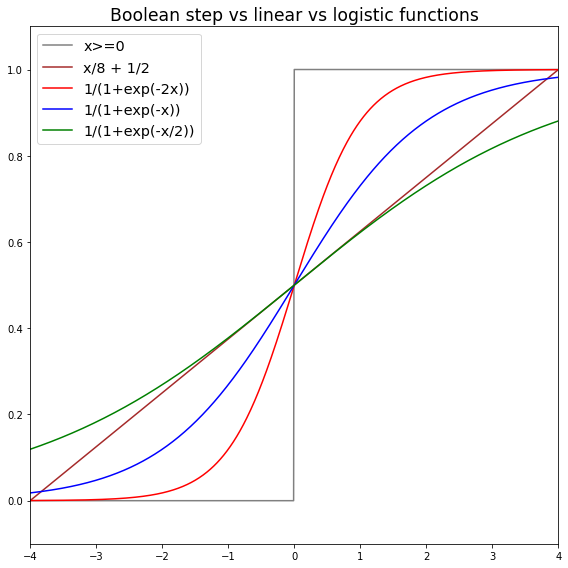

In [ ]:
X = [x * 0.01 for x in range(-400,400)]

def logit_1(x):
  return 1 / (1 + np.exp(-2*x))

def logit_2(x):
  return 1 / (1 + np.exp(-x))

def logit_3(x):
  return 1 / (1 + np.exp(-(x * 0.5)))


# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X, [1 if x >= 0 else 0 for x in X], color='gray', label='x>=0')
ax.plot(X, [x/8+0.5 for x in X], color='brown', label='x/8 + 1/2')
ax.plot(X, [logit_1(x) for x in X], color='red', label='1/(1+exp(-2x))')
ax.plot(X, [logit_2(x) for x in X], color='blue', label='1/(1+exp(-x))')
ax.plot(X, [logit_3(x) for x in X], color='green', label='1/(1+exp(-x/2))')
ax.set_title('Boolean step vs linear vs logistic functions',fontsize='xx-large')
ax.set_xlim(-4, 4)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize='x-large')
plt.tight_layout()

plt.show()


### 3.3.2 Using Logistic Regression in SciKit-Learn

We can easily use a logistic regression classifier from SciKit to train and make predictions.

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

dataset = load_wine()
dataset.feature_names

from sklearn.model_selection import train_test_split
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(dataset.data, \
                                                    dataset.target, \
                                                    test_size=0.40)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 94.4%


In [ ]:
print(clf.coef_, clf.intercept_)

[[ 0.37267126  0.51652045  0.23108832 -0.13842391  0.03966274  0.26451135
   0.62364518  0.02192541  0.01903155  0.19678096  0.02322726  0.41110478
   0.01088526]
 [-0.70377242 -0.80346263 -0.26454628 -0.0414934  -0.01386839  0.00318437
   0.27249671 -0.09049248  0.26532123 -1.13045252  0.11383007  0.13944012
  -0.00906274]
 [ 0.33110116  0.28694218  0.03345797  0.17991731 -0.02579435 -0.26769572
  -0.8961419   0.06856707 -0.28435278  0.93367156 -0.13705733 -0.5505449
  -0.00182252]] [-19.92246934  24.50216487  -4.57969553]


### 3.3.3 Introducing SciKit-Learn Pipelines

Often we need to do sequences of transformations on our data.  SciKit-Learn allows us to capture this using a *pipeline* of operations.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scl = StandardScaler()

pca = PCA()

clf = LogisticRegression(max_iter=10000, penalty='l2')

pipe = Pipeline(steps=[('Scale',scl),('PCA',pca),('LogReg',clf)])

pipe.fit(X_train,y_train)

prediction = pipe.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 95.8%


### 3.3.3 Logistic Regression for Big Data

In [ ]:
!apt install libkrb5-dev
!pip install sparkmagic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libcom-err2 libgssrpc4 libkadm5clnt-mit11
  libkadm5srv-mit11 libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
The following packages will be upgraded:
  libcom-err2
1 upgraded, 7 newly installed, 0 to remove and 24 not upgraded.
Need to get 358 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcom-err2 amd64 1.44.1-1ubuntu1.3 [8,848 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.1 [54.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.1 [37.2 kB]
Get:4 http

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
%spark add -s my_session -l python -u http://ec2-3-91-74-45.compute-1.amazonaws.com:8998
# The above can connect to an EMR node running Spark + Livy, assuming the firewall is set to let anyone in

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
87,application_1581350900124_0088,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [ ]:
%%spark

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.sql.types import StringType, IntegerType, DoubleType, StructField, StructType, ArrayType, MapType

dataset = load_wine()
# ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
schema = StructType([
        StructField("alcohol", DoubleType(), True),
        StructField("malic_acid", DoubleType(), True),
        StructField("ash", DoubleType(), True),
        StructField("alcalinity_of_ash", DoubleType(), True),
        StructField("magnesium", DoubleType(), True),
        StructField("total_phenols", DoubleType(), True),
        StructField("flavanoids", DoubleType(), True),
        StructField("nonflavanoid_phenols", DoubleType(), True),
        StructField("proanthocyanins", DoubleType(), True),
        StructField("color_intensity", DoubleType(), True),
        StructField("hue", DoubleType(), True),
        StructField("od280/od315_of_diluted_wines", DoubleType(), True),
        StructField("proline", DoubleType(), True),
        StructField("label", IntegerType(), True),
         ])

### For simplicity we are only going to do a binary classifier
### to determine if we have class 1
pdf = pd.DataFrame(dataset.data)
pdf['label'] = [1 if x == 1 else 0 for x in dataset.target]
print(pdf)
wine_sdf = spark.createDataFrame(pdf, schema)

# Recall from unsupervised learning that the assembler cconverts a list of
# dataframe columns into a "features" column that's a vector
assembler = VectorAssembler(inputCols=dataset.feature_names, outputCol="features")
wine_sdf_2 = assembler.transform(wine_sdf)

wine_sdf_2.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         0     1     2     3      4  ...      9    10    11      12  label
0    14.23  1.71  2.43  15.6  127.0  ...   5.64  1.04  3.92  1065.0      0
1    13.20  1.78  2.14  11.2  100.0  ...   4.38  1.05  3.40  1050.0      0
2    13.16  2.36  2.67  18.6  101.0  ...   5.68  1.03  3.17  1185.0      0
3    14.37  1.95  2.50  16.8  113.0  ...   7.80  0.86  3.45  1480.0      0
4    13.24  2.59  2.87  21.0  118.0  ...   4.32  1.04  2.93   735.0      0
..     ...   ...   ...   ...    ...  ...    ...   ...   ...     ...    ...
173  13.71  5.65  2.45  20.5   95.0  ...   7.70  0.64  1.74   740.0      0
174  13.40  3.91  2.48  23.0  102.0  ...   7.30  0.70  1.56   750.0      0
175  13.27  4.28  2.26  20.0  120.0  ...  10.20  0.59  1.56   835.0      0
176  13.17  2.59  2.37  20.0  120.0  ...   9.30  0.60  1.62   840.0      0
177  14.13  4.10  2.74  24.5   96.0  ...   9.20  0.61  1.60   560.0      0

[178 rows x 14 columns]
+-------+----------+----+-----------------+---------+-------------+--------

In [ ]:
%%spark

train, test = wine_sdf_2.randomSplit([0.7, 0.3], seed = 2018)

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label')
clfModel = lr.fit(train)
predictions = clfModel.transform(test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Area Under ROC: 0.996969696969697

## 3.4 Gradient Descent

### 3.4.1 Gradient Descent with a Linear Function

To look at gradient descent, let's first consider a simple example based on our wine dataset, with a linear value for our prediction.  (We'll relax this in a moment to consider the logistic function.)

We can define the cost function to be Mean Squared Error as follows:

$MSE = {1 \over n}\Sigma^n_{i=1}(\hat{y}^{(i)} - y^{(i)})$

where

$\hat{y}^{(i)} = \sigma(w^T \cdot x^{(i)})$.

For this part we'll generate a simple artificial dataset with two "blob" clusters.


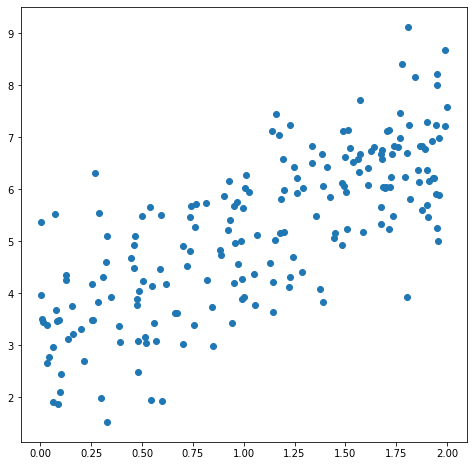

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a series of points
X = 2 * np.random.rand(200, 1)

# We are plotting y = 2x + 3 plus a random
# value 
y = 2 * X + 3 + np.random.randn(200, 1)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

# Change X-vector to include an additional feature with value 1,
# for the bias/intercept term

X2 = np.ones((X.shape[0],2))
X2[:,1] = X.T

X_train, X_test, y_train, y_test = train_test_split(X2, \
                                                    y, \
                                                    test_size=0.30)

y_train

array([[4.57785734],
       [5.0036551 ],
       [5.49422844],
       [6.15510511],
       [2.69857218],
       [5.20884985],
       [4.46437859],
       [3.62699811],
       [6.22208829],
       [5.81504589],
       [4.03783965],
       [6.43273652],
       [1.87566814],
       [6.82053787],
       [5.60357145],
       [5.80982558],
       [2.47970647],
       [9.12722452],
       [4.22937864],
       [6.05068087],
       [4.19614322],
       [5.48631085],
       [6.01577435],
       [6.76972496],
       [1.52317263],
       [5.73943867],
       [5.37456267],
       [6.61454656],
       [5.24451502],
       [3.3990313 ],
       [5.85197812],
       [3.21308583],
       [6.84027095],
       [6.37666209],
       [4.93674547],
       [3.42170438],
       [7.11716032],
       [3.07619774],
       [6.13214304],
       [5.64836179],
       [6.41584787],
       [4.41579284],
       [5.66917858],
       [6.83095782],
       [6.15216418],
       [4.55744452],
       [1.92577453],
       [4.527

(2,)

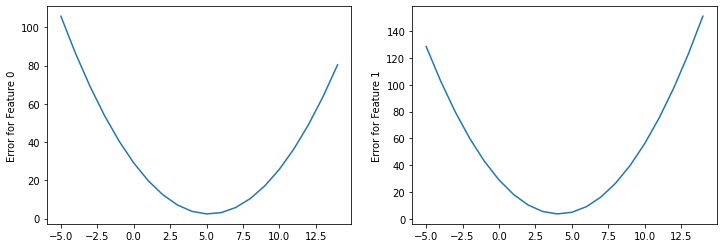

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


x_coord = range(-5,15)

plt.figure(figsize=(12, 4))

w = np.random.randn(2)

# Here's our cost function, as mean squared error
def cost_fn(X, y, p, fn):
  if len(X.shape) == 1:
    # Single row, return the squared error
    return np.square(y - fn(X[p]))
  else:
    # Matrix, return the mean of the squared errors
    return np.average([cost_fn(X[i], y[i], p, fn) for i in range (0, X.shape[0])])

# Now let's plot the error function for a *single instance*, for each feature,
# for a range of weights and the *linear* function x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: x*w) for w in x_coord])
  ax.set_ylabel('Error for Feature ' + str(feature))
  

[[2.95508592]
 [2.05189431]]
[15.567016814432604, 14.282079474424483, 13.114315215259426, 12.053016494725378, 11.088454399135392, 10.211789199430426, 9.414989082209496, 8.690756308521122, 8.032460121538998, 7.43407578629232, 6.8901292009977135, 6.395646570763627, 5.946108680980136, 5.537409349995536, 5.165817679104292, 4.827943752782487, 4.520707473827566, 4.241310246880689, 3.987209249997328, 3.7560940577255466, 3.5458654007705954, 3.354615866967689, 3.1806123661326864, 3.0222801975770572, 2.8781885738080155, 2.747037467322455, 2.6276456595675555, 2.5189398821932887, 2.419944950764351, 2.329774800223436, 2.2476243396882425, 2.1727620516973554, 2.1045232678644137, 2.04230405911869, 1.9855556843605777, 1.9337795464943792, 1.8865226094655054, 1.8433732341675466, 1.8039573949356527, 1.7679352418416747, 1.734997977185743, 1.7048650174675735, 1.6772814147454551, 1.652015513675583, 1.6288568226912035, 1.6076140797497833, 1.588113494865214, 1.5701971532673928, 1.553721564508267, 1.53855634417

Text(0, 0.5, 'Mean-squared error (loss)')

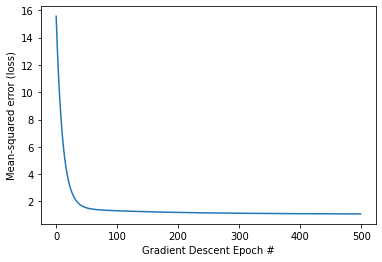

In [ ]:
def gradient_descent(epochs, eta, X, w, y):
  """
  The gradient descent iterates for *epochs* rounds, making a step
  of size eta.  It will be adjusting w, based on the prediction for each
  instance vs y and the overall error.
  """
  # We'll use this list to accumulate
  # the error
  overall_error = []
  # Iterate over each epoch
  for i in range(epochs):
    # This is y-hat, the predictions for each
    # class label before they are thresholded
    # based on comparison with 0.5
    predictions = X.dot(w)

    # The overall error, as a vector
    error = (predictions - y)

    # Record the MSE so we can plot it
    mean_sq_error = np.sum(error ** 2) / X.shape[0]
    overall_error.append(mean_sq_error)

    # Now we update the weights.
    # The gradient is based on the partial derivative
    # of the MSE with respect to w.
    gradient = 2 / X.shape[0] * X.T.dot(error)

    w = w - eta * gradient

  return w, overall_error

# Training rounds or epochs
epochs = 500
eta = 0.01

w = np.zeros((2,1))
w[:,0] = np.random.randn(2)

weights, evect = gradient_descent(epochs, eta, X_train, w, y_train)
print (weights)
print (evect)

# Plot the mean-squared error
plt.plot(range(0,epochs), evect)
plt.xlabel('Gradient Descent Epoch #')
plt.ylabel('Mean-squared error (loss)')

## 3.4.2 Gradient Descent for Training Logistic Regression

Let's try this with logistic regression, using the sigmoid function...

First' let's look at the shape of the cost functions for $y_i=1$, $y_i=0$...

In [ ]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, \
                    cluster_std=1.10, random_state=42)


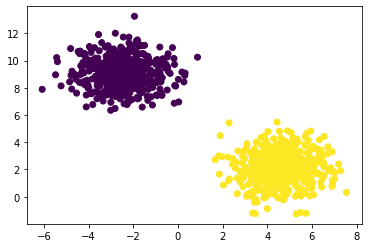

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.30)


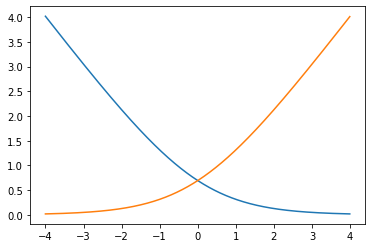

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import math

def prediction(x):
  return 1.0 / (1 + np.exp(-x))

x = [(i - 500)/125 for i in range(1000)]

# Recall the cost function
plt.plot(x,[-math.log(prediction(i)) for i in x])
plt.plot(x,[-math.log(1 - prediction(i)) for i in x])

[ 1.05041276 -0.30054439]
[0.19629723239746574, 0.16155183668875844, 0.13267008042817896, 0.10933432914787958, 0.09077562005221607, 0.07610936287843625, 0.06451633942310563, 0.05531116537112461, 0.04795008931392077, 0.0420135152496342, 0.03718186269926918, 0.03321277132260288, 0.029922248854196042, 0.02717001224863582, 0.02484843595327181, 0.022874343311033635, 0.02118294550484544, 0.01972336836958864, 0.018455341740169655, 0.01734673726190489, 0.016371726024035176, 0.01550939056947857, 0.014742671687656184, 0.014057563367486776, 0.01344249291876345, 0.012887840215697026, 0.01238556220217346, 0.011928897599132349, 0.011512133144302064, 0.011130417361162664, 0.01077961128343259, 0.010456168097788196, 0.010157035555635706, 0.009879576419360707, 0.009621503275103334, 0.009380824853396905, 0.009155801616815496, 0.0089449088482248, 0.008746805839700887, 0.00856031006684119, 0.00838437545550863, 0.008218074022592533, 0.00806058031010303, 0.007911158141136729, 0.007769149313274362, 0.00763396

Text(0, 0.5, 'Mean-squared error (loss)')

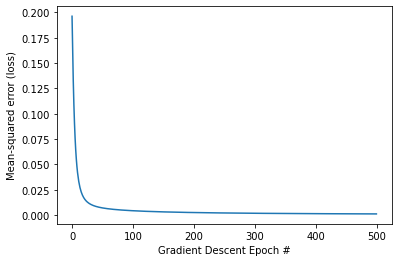

In [ ]:
import numpy as np

# Here is our sigmoid function for making
# predictions with logistic regression
# or with perceptron-style neural nets
def prediction(x):
  return 1.0 / (1 + np.exp(-x))


def gradient_descent(epochs, eta, X, w, y):
  """
  The gradient descent iterates for *epochs* rounds, making a step
  of size eta.  It will be adjusting w, based on the prediction for each
  instance vs y and the overall error.
  """
  # We'll use this list to accumulate
  # the error
  overall_error = []
  # Iterate over each epoch
  for i in range(epochs):
    # This is y-hat, the predictions for each
    # class label before they are thresholded
    # based on comparison with 0.5
    predictions = prediction(X.dot(w))

    # The overall error, as a vector
    error = (predictions - y)

    # Record the MSE so we can plot it
    mean_sq_error = np.sum(error ** 2) / X.shape[0]
    overall_error.append(mean_sq_error)

    # Now we update the weights.
    # The gradient is based on the partial derivative
    # of the log loss with respect to w.
    gradient = 1 / X.shape[0] * X.T.dot(error)

    w = w - eta * gradient

  return w, overall_error

# Training rounds or epochs
epochs = 500
eta = 0.01

w = np.random.randn(2)

weights, evect = gradient_descent(epochs, eta, X, w, y)
print (weights)
print (evect)

# Plot the mean-squared error
plt.plot(range(0,epochs), evect)
plt.xlabel('Gradient Descent Epoch #')
plt.ylabel('Mean-squared error (loss)')

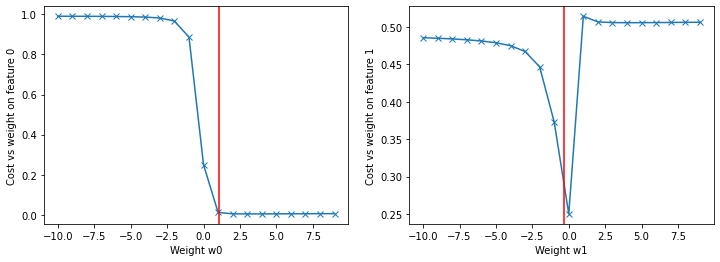

In [ ]:
x_coord = range(-10,10)

plt.figure(figsize=(12, 4))

# Now let's plot the error function for each feature,
# for a range of weights and the output of the sigmoid function over x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: prediction(x*w)) for w in x_coord],
          marker='x')

  ax.axvline(x=weights[feature], color='red')
  ax.set_ylabel('Cost vs weight on feature ' + str(feature))
  ax.set_xlabel('Weight w' + str(feature))

We've trained the weights -- let's make predictions!

In [ ]:
for item in range(len(X_test)):
  predicted_label = 0 if prediction(X_test[item].dot(weights)) < 0.5 else 1

  print('Prediction {} vs {}'.format(predicted_label, y_test[item]))

Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction